In [4]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

%matplotlib inline
plt.rcParams["font.family"] = 'NanumBarunGothic'

X.shape: (26, 2)


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


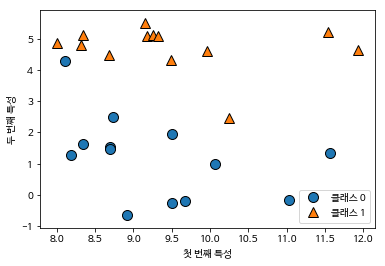

In [5]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번째 특성")

plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'타깃')

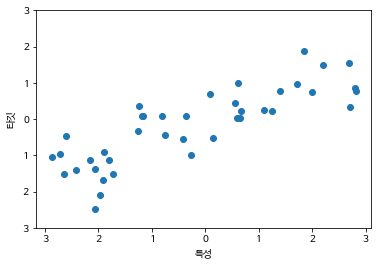

In [82]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [86]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(type(cancer))
print("cancer.keys(): \n{}".format(cancer.keys()))

<class 'sklearn.utils.Bunch'>
cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [91]:
print("유방암 데이터 형태: {}".format(cancer.data.shape))

print("클래스별 샘플 개수:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

유방암 데이터 형태: (569, 30)
클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


In [93]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [95]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


In [96]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


C:\Users\dlwog\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


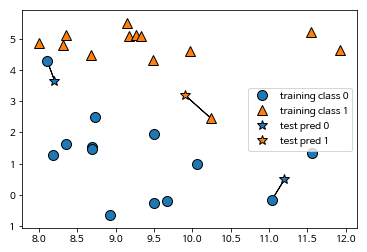

In [97]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

C:\Users\dlwog\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


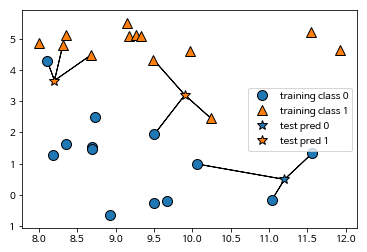

In [98]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [7]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

C:\Users\dlwog\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [106]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [107]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


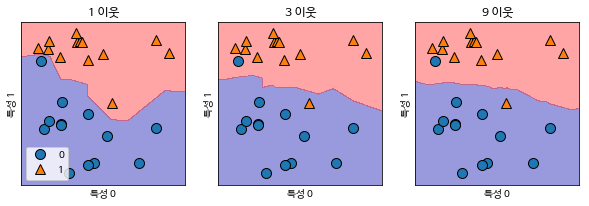

In [113]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in  zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax,
                                   alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc = 3)

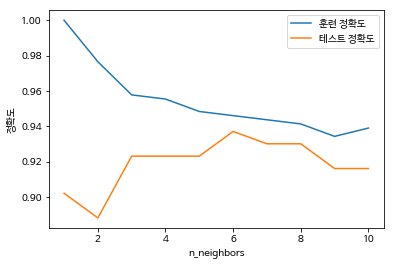

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = "훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label = "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

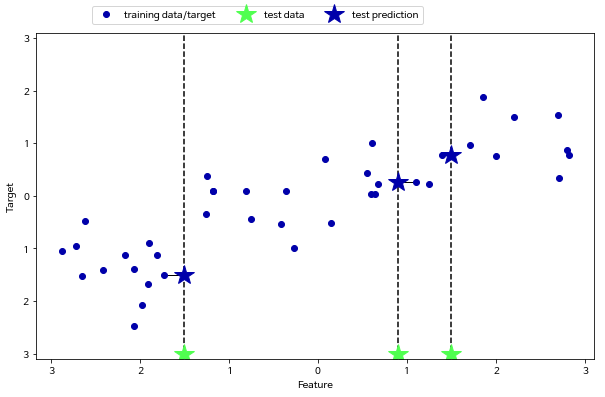

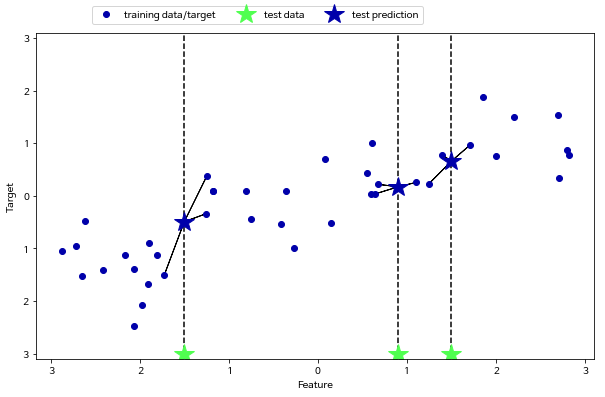

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [29]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [31]:
print("테스트 세트 예측: \n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


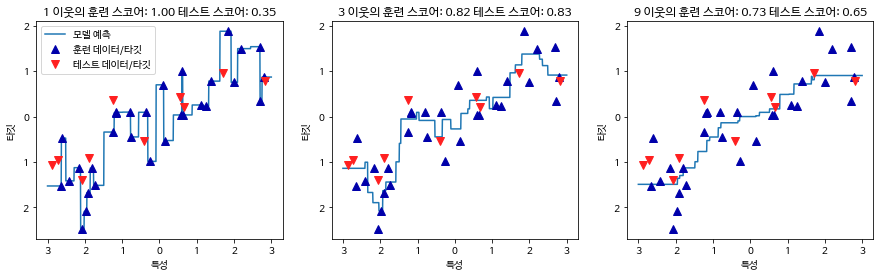

In [46]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
    "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),
                                                  reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")

axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc = "best")

w[0]: 0.393906  b: -0.031804


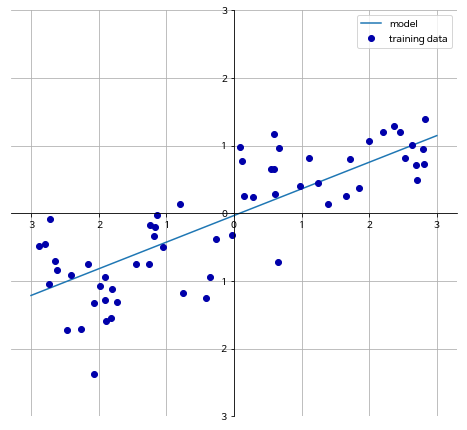

In [47]:
mglearn.plots.plot_linear_regression_wave()

In [48]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [50]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [51]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
훈련 세트 점수: 0.66


In [52]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [53]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
훈련 세트 점수: 0.61


In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
훈련 세트 점수: 0.75


In [63]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.79
훈련 세트 점수: 0.64
훈련 세트 점수: 0.93
훈련 세트 점수: 0.77


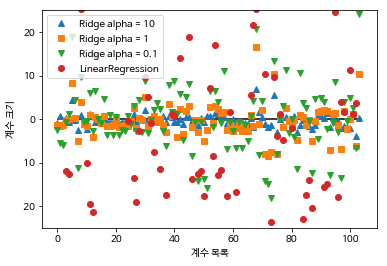

In [72]:
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

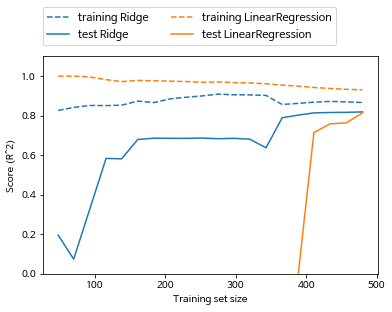

In [74]:
mglearn.plots.plot_ridge_n_samples()

In [79]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [78]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [81]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 94


Text(0,0.5,'계수 크기')

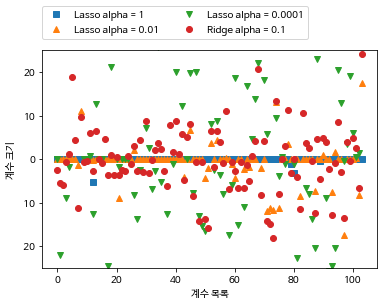

In [85]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc = (0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

C:\Users\dlwog\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


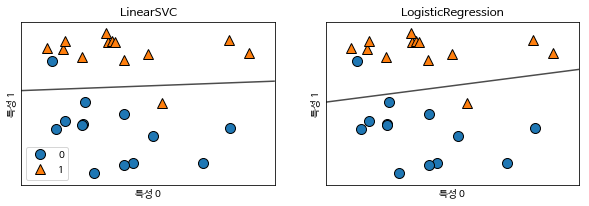

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5,
                                   ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

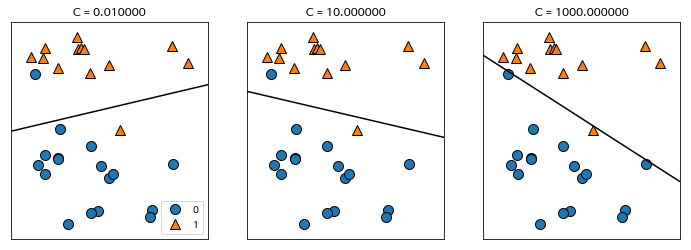

In [91]:
mglearn.plots.plot_linear_svc_regularization()

**2 지도 학습**

2.1 분류와 회귀

1) 분류

① 이진 분류 
- 스팸 메일 분류
- 클래스를 "양성 / 음성"으로 나누기도 한다.

② 다중 분류

2) 회귀
- 연간 소득 예측, 수확량 예측
- 연속성을 띄는 부동소수점수(실수) 예측

2.2 일반화, 과대적합, 과소적합

1) 일반화
- 모델이 처음 보는 데이터에 대해 정확하게 예측
- 훈련 세트에서 테스트 세트로 일반화 되었다고 함

2) 과대적합(Overfitting)
- 일반적으로 간단한 모델일 경우, 일반화가 쉽기 때문에 선호하게 됨
- 가진 정보를 모두 사용하여 복잡한 모델을 만들 경우 일반화가 어려워지고 과대적합

3) 과소적합(underfitting)
- 모델이 너무 간단하여 데이터의 면면과 다양성을 잡아내지 못함
- 결과적으로 너무 간단한 모델로 인해 일반화가 힘든 경우

4) 일반화 성능이 최대가 되는 모델을 찾아야 함

2.2.1 모델 복잡도와 데이터셋 크기의 관계
- 데이터가 많을수록 과대적합 없이 더 복잡한 모델 만들 수 있음
- 데이터의 중복이나 비슷한 데이터를 모으는 것은 도움되지 않음

2.3 지도 학습 알고리즘

1) k-NN

① k-NN 분류
- 이웃의 수를 많을수록 결정 경계 부드러워짐 -> 단순한 모델
- 이웃의 수가 적을수록 모델의 복잡도 높아짐

② k-NN 회귀
- 이웃 간의 평균으로 예측
- 일반 회귀 모델에서 처럼 예측의 적합도를 R^2로 계산 가능

③ 장단점과 매개변수
- 중요한 매개변수는 2개 (거리를 재는 방법, 이웃의 수)
- 이해하기 쉬운 모델
- 훈련 세트가 크면 예측이 느려짐
- 많은 특성을 가진 데이터셋에 잘 작동하지 않음
- 특성 값 대부분이 0인 데이터셋에 잘 작동하지 않음
- 현업에서 잘 사용하지 않음

2) 선형 모델

① 선형 모델의 특징
- 100여년 전에 개발되었지만 현재도 널리 쓰임
- 입력 특성에 선형 함수를 만들어 예측


